In [1]:
from matplotlib import pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn import metrics
import pandas as pd 
import numpy as np 

In [2]:
data = pd. read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data=data.drop(["id","Unnamed: 32"],axis=1)
data["diagnosis"]=data["diagnosis"].map({'B':0,'M':1}).astype(int)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


From the KNN notebook, we observe that there are 6 sets of parameters that are highly correlated to each other, to keep it consistent, dropping area, radius and concave points parameter. 



In [5]:
x=data[['radius_mean','compactness_mean',"smoothness_mean","texture_mean", "symmetry_mean","concavity_mean","fractal_dimension_mean"]]
y=data[['diagnosis']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [6]:
x_train.shape

(455, 7)

In [7]:
logistic_reg = LogisticRegression() 
logistic_reg.fit(x_train, y_train)
logistic_reg.score(x_test, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.868421052631579

Now predicting using the model 


In [8]:
y_pred = logistic_reg.predict(x_test)
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1]


[[65 10]
 [ 5 34]]


<function matplotlib.pyplot.show(close=None, block=None)>

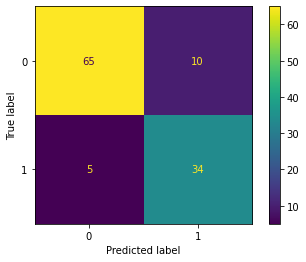

In [9]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(logistic_reg, x_test, y_test)
plt.show

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        75
           1       0.77      0.87      0.82        39

    accuracy                           0.87       114
   macro avg       0.85      0.87      0.86       114
weighted avg       0.88      0.87      0.87       114



In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

classifier = LogisticRegression(random_state = 0)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 90.76 %
Standard Deviation: 4.15 %


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

K-Fold cross validation 

In [12]:
print(accuracies)

[0.84782609 1.         0.91304348 0.91304348 0.91304348 0.93333333
 0.91111111 0.88888889 0.91111111 0.84444444]
